# Problem 1: Crossword CSP (30 points)

Run or download the latest version (4.6.1) of the "Consistency based CSP solver" applet from [AIspace](http://www.aispace.org/downloads.shtml). Then navigate to "File" at the top menu, followed by "Load Sample CSP", and select "Crossword Problem 2". This CSP represents the simple crossword shown below. The goal of this puzzle is to fill in the grid such that each row and column of letters is an English word. The CSP is thus naturally formulated with each row or column as a variable, each domain as the set of possible words that may be filled in, and each constraint specifying letters that must match.

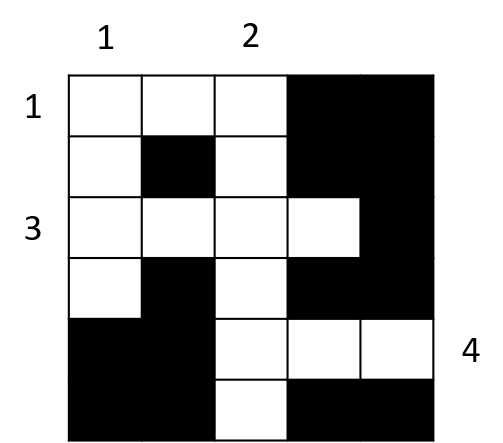

1. Give an explicit form of the constraint between "1-across" and "1-down". You can click on each variable to see its full domain after clicking on the "Solve" tab near the upper left.

2. Suppose we are doing backtracking search. Which variable(s) should we assign first based on the degree heuristic? What about the MRV heuristic? Assume that we have not yet made any assignments for either case.

3. We start doing backtracking search and assign "ginger" to "2-down". Which domain reductions take place as a result of **forward checking**? Should we proceed with any further assignments?

4. We start doing backtracking search and assign "big" to "1-across". Which domain reductions take place as a result of enforcing **arc consistency** on the entire CSP? Should we proceed with any further assignments?

5. Reset the CSP to its initial state and perform full arc consistency without any initial assignments (click the button "Auto Arc-Consistency"). What happens when you make any assignment and then run arc consistency once more? How many solutions are there to this crossword puzzle?

ENTER YOUR RESPONSES HERE

1. C = {(oneacross, onedown) ∈ {(big, book), (big,buys), (bus, book), (bus, buys), (has, hold)}} 
2. Degree: twodown MRV: twodown
3. oneacross is reduced to {big}, threeacross is reduced to {land}, and fouracross is reduced to nothing, so we should not proceed with further assignments since a domain is empty. The assignment failed. We should not proceed with further assignments.
4. onedown is reduced to {book, buys} and twodown is reduced to {ginger}, then threeacross is reduced to {year}, which further reduced onedown to {buys} to keep arc consistency. However, this conflicts with twodown, so this assignment was not arc consistant and not valid. We should not proceed with further assignments.
5.  When I make an assignment and run arc consistency, it finds a solution by reducing the remaining domains. There are 2 solutions to this crossword.


# *(m,n,k)*-Game

Here you will design and play with a simple agent for a [*m,n,k*-game](https://en.wikipedia.org/wiki/M,n,k-game). This is a generalization of tic-tac-toe to a *m* x *n* board, with the goal of getting *k* in a row. As in tic-tac-toe, there are two players, X and O, and they take turns marking cells on the board. Here are our rules:
*   This is a zero-sum game; a win for X is equally a loss for O and vice versa. We take X to be the maximizing player and O to be the minimizing player.
*   There are no "draws" in this game. O wins as long as X does not get *k* in a row; thus, draws in regular tic-tac-toe (no empty spaces left) are considered wins for O and losses for X.
*   Unless otherwise specified, X always goes first.

You'll find the game-specific functions ```actions```, ```result```, and ```terminal``` used by minimax and alpha-beta search below. The last one also calls the utility functions ```k_in_row``` and ```sequences```. Here are the details...
*   States are represented as 2d numpy arrays. Elements may be 'X', 'O', or '.' for blanks.
*   Taking an action means picking a blank space and marking it. ```actions``` returns all possible actions, or equivalently, all indices of blanks.
*   ```result``` creates and returns a new state with the indicated space filled in by the given player (either 'X' or 'O').
* ```terminal``` serves as both a terminal test and utility function to save some work. First return argument is True (if someone has won) or False; second argument is utility if the state is terminal or ```None``` otherwise.

In [86]:
import numpy as np

def actions(state):
  # Returns indices of all blank spaces on board
  return [i for i,s in np.ndenumerate(state) if s=='.']

def result(state, player, action):
  # Returns a new state (deepcopied) with action space taken by player
  new_state = state.copy()
  new_state[action] = player
  return new_state

def terminal(state, k):
  # Test whether state is a terminal or not; also return game score if yes
  X_indices = [i for i,s in np.ndenumerate(state) if s=='X']
  if k_in_row(X_indices, k): 
    return True, 1
  O_indices = [i for i,s in np.ndenumerate(state) if s=='O']
  blanks = np.count_nonzero(state == '.')
  if k_in_row(O_indices, k) or blanks == 0: 
    return True, -1
  return False, None

#-------------------------------------------------------------------------------
# Utility functions used by terminal (above)

def k_in_row(indices, k):
  # Test whether there are k consecutive indices in a row in the given list
  index_set = set(indices)
  for i in indices:
    for seq in sequences(i, k):
      if seq.issubset(index_set):
        return True
  return False

def sequences(i, k):
  # Return 4 sets of k indices in the "rows" starting from index i
  across = set([(i[0], i[1]+j) for j in range(k)])
  down = set([(i[0]+j, i[1]) for j in range(k)])
  diagdown = set([(i[0]+j, i[1]+j) for j in range(k)])
  diagup = set([(i[0]+j, i[1]-j) for j in range(k)])
  return across, down, diagdown, diagup

## Coding 1 (20 points)

We will now design an alpha-beta search agent to play this game. The skeleton functions below follow the pseudocode provided in the lecture and textbook. The inclusion of *k* as an argument allows it to be passed into ```terminal```. Write the main loops of the ```max_value``` and ```min_value``` functions. Remember that the ```result``` function takes in a player argument, and that X is MAX while O is MIN.

In [87]:
def alpha_beta_search(state, player, k):
  # Initialize a game tree search for (m,n,k) game
  # X is maximizing player, O is minimizing player
  if player == 'X':
    value, move = max_value(state, -float("inf"), float("inf"), k)
  else:
    value, move = min_value(state, -float("inf"), float("inf"), k)
  return value, move

def max_value(state, alpha, beta, k):
  isTerminal, score = terminal(state, k)
  if isTerminal:
    return score, None

  # YOUR CODE HERE
  move = None
  maxEval = -float("inf")
  
  for action in actions(state):
    # get new state from action
    new_state = result(state, 'X', action)

    # get the value and move from that state from the min_value function
    eval, eval_move = min_value(new_state, alpha, beta, k)

    # if the eval is the biggest yet, it is optimal to follow it, so we save that val and move
    if eval > maxEval:
      maxEval = eval
      move = action

    # we see if alpha is greater than beta to prune
    alpha = max(alpha, eval)
    if beta <= alpha:
      break

  return maxEval, move



def min_value(state, alpha, beta, k):
  isTerminal, score = terminal(state, k)
  if isTerminal:
    return score, None

  # YOUR CODE HERE
  move = None
  minEval = float("inf")

  for action in actions(state):
    # get new state from action
    new_state = result(state, 'O', action)

    # get the value and move from that state from the min_value function
    eval, eval_move = max_value(new_state, alpha, beta, k)

    # if the eval is the smallest yet, it is optimal to follow it, so we save that val and move
    if eval < minEval:
      minEval = eval
      move = action

    # update beta
    beta = min(beta, eval)
  
  return minEval, move



You can test the functions above by either finding the values of terminal states or states close to terminal states, for which you know the winner with certainty. (Remember that states are 2d numpy arrays.) For example, in the (3,3,3) game, ```max_value``` of a state with two X's and a blank in a row should certainly return a move leading to a winning state for X. Same goes for ```min_value``` and O.

Once you're happy with your agent implementation, let's test it out in a full game. The following ```game_loop``` takes in an initial state, the value of *k*, the search algorithm to use (which for now is just ```alpha_beta_search```) and any additional parameters for the search algorithm (none for now). 

When it runs, ```game_loop``` simply goes back and forth between the two players. Each player plans its next move using ```search```, the move is executed, the state is updated, and the opposing player's turn is taken. This ends when we hit a terminal state.

In [88]:
def game_loop(state, k, search, X_params=[], O_params=[]):
  # Play a (m,n,k) game using provided search function and parameters
  player = 'X'
  isTerminal = False
  while not isTerminal:
    if player == 'X':
      value, move = search(state, player, k, *X_params)
      state = result(state, player, move)
      player = 'O'
    else:
      value, move = search(state, player, k, *O_params)
      state = result(state, player, move)
      player = 'X'
    print(np.matrix(state), "\n")
    isTerminal, _ = terminal(state, k)

  if value > 0: print("X wins!")
  elif value < 0: print("O wins!")
  else: print("Draw!")

Let's have our agent play against itself! Run the code below to play standard tic-tac-toe. Remember that both players play optimally.

In [89]:
m, n, k = 3, 3, 3 
print((m,n,k))
initial = np.full((m,n), '.')
game_loop(initial, k, alpha_beta_search)

(3, 3, 3)
[['X' '.' '.']
 ['.' '.' '.']
 ['.' '.' '.']] 

[['X' '.' '.']
 ['.' 'O' '.']
 ['.' '.' '.']] 

[['X' 'X' '.']
 ['.' 'O' '.']
 ['.' '.' '.']] 

[['X' 'X' 'O']
 ['.' 'O' '.']
 ['.' '.' '.']] 

[['X' 'X' 'O']
 ['X' 'O' '.']
 ['.' '.' '.']] 

[['X' 'X' 'O']
 ['X' 'O' '.']
 ['O' '.' '.']] 

O wins!


## Response 1 (5 points)

What was the result of the game? Assuming both players play optimally, can we ever have a different player win? What if we change the starting player, or choose a different move wherever minimax returns multiple equally good moves? Explain why it is or is not possible for a different final result to arise with these changes.


The result was that player O wins every time. Since both players play optimally, O will always win since they win the draws. 

Even if we change the starting player or return a different equally optimal move, O will always win. 

The starting player doesn't matter because no matter who starts in tic tac toe, an optimal player can always lead it to a draw. Since O wins draws, O wins no matter who starts. 

Returning a different equally optimal move will also not change the outcome since the search checks all possible outcones. Therefore any more that is just is optimal also ends in O winning.

Our code is suitable for any values of *m,n,k*. Below are three game instances to try out (you could also try more, although any board larger than 4x4 will probably take a long time to finish). Run each scenario, think about the results, and answer the questions below.

In [90]:
#m, n, k = 2, 5, 3
#m, n, k  = 3, 4, 3
m, n, k = 3, 4, 4
print((m,n,k))
initial = np.full((m,n), '.')
game_loop(initial, k, alpha_beta_search)

(3, 4, 4)
[['X' '.' '.' '.']
 ['.' '.' '.' '.']
 ['.' '.' '.' '.']] 

[['X' 'O' '.' '.']
 ['.' '.' '.' '.']
 ['.' '.' '.' '.']] 

[['X' 'O' 'X' '.']
 ['.' '.' '.' '.']
 ['.' '.' '.' '.']] 

[['X' 'O' 'X' 'O']
 ['.' '.' '.' '.']
 ['.' '.' '.' '.']] 

[['X' 'O' 'X' 'O']
 ['X' '.' '.' '.']
 ['.' '.' '.' '.']] 

[['X' 'O' 'X' 'O']
 ['X' 'O' '.' '.']
 ['.' '.' '.' '.']] 

[['X' 'O' 'X' 'O']
 ['X' 'O' 'X' '.']
 ['.' '.' '.' '.']] 

[['X' 'O' 'X' 'O']
 ['X' 'O' 'X' 'O']
 ['.' '.' '.' '.']] 

[['X' 'O' 'X' 'O']
 ['X' 'O' 'X' 'O']
 ['X' '.' '.' '.']] 

[['X' 'O' 'X' 'O']
 ['X' 'O' 'X' 'O']
 ['X' 'O' '.' '.']] 

[['X' 'O' 'X' 'O']
 ['X' 'O' 'X' 'O']
 ['X' 'O' 'X' '.']] 

[['X' 'O' 'X' 'O']
 ['X' 'O' 'X' 'O']
 ['X' 'O' 'X' 'O']] 

O wins!


## Response 2 (10 points)
1.  Which of the three scenarios is X able to win? Explain why it appears as if O is not even trying to prevent X from winning at any point in this game.
2.  What is happening in the last scenario (3,4,4)? Why does X have no hope of winning in this game?

ENTER YOUR RESPONSES HERE

1.  X is able to win in the second scenario (3,4,3). It seems as if O is not even trying to prevent X from winning since O already knows that both players play optimally, so X winning is inevitable. This means that any move O selects is equally nonoptimal, so it doesn't matter where O moves.
2.  In the last scenario, both players know that all possible optimal plays lead to a draw, so they just move at the first open space until there is a draw and O wins. X has no hope of winning the game because O plays optimally and will always lead the game to a draw/O win.

In order to expand our agent's capacity to deal with boards larger than (4,4) in a reasonable amount of time, we have to accept some suboptimality. This means cutting off search using depth limiting, which in turn requires an evaluation function for non-terminal states. There is a standard set of strategies for tic-tac-toe which can inform what this looks like, but we'll go with a numerical rather than a rule-based function here.

In [91]:
def eval(state, k):
  X_indices = [i for i,s in np.ndenumerate(state) if s=='X']
  O_indices = [i for i,s in np.ndenumerate(state) if s=='O']
  blanks = [i for i,s in np.ndenumerate(state) if s=='.']

  X_and_blanks = X_indices + blanks
  Xset = set(X_indices)
  Xbset = set(X_and_blanks)
  X_score = 0
  for i in X_and_blanks:
    for seq in sequences(i, k):
      if seq.issubset(Xbset):
        ratio = len(seq & Xset)/k
        X_score = max(X_score, ratio)

  O_and_blanks = O_indices + blanks
  Oset = set(O_indices)
  Obset = set(O_and_blanks)
  O_score = 0
  for i in O_and_blanks:
    for seq in sequences(i, k):
      if seq.issubset(Obset):
        ratio = len(seq & Oset)/k
        O_score = max(O_score, ratio)
  
  return X_score - O_score

## Response 3 (10 points)

Please briefly describe a high-level interpretation of what this evaluation function is computing and returning. What do the ```X_score``` and ```O_score``` variables represent? As a hint, the conditional in each of the inner loops is triggered whenever there is a combination of *k* X's and blanks (or O's and blanks) in a row. 

This eval funtion is computing a value that represents how close X is to winning by getting k Xs in a row before O does. The X_score and O_score represent a percentage of how close a completable sequence is to being finished. The total funtion returns the (X_score-O_score) to show if X or O is closer to finishing a sequence. If that number is higher, it is better for X.

For example, if k=4 and X has 3 Xs in a row then a blank, it would be close to a win. This evaluation funtion shows that.




## Coding 2 (15 points)

We will also need some new functions to implement alpha-beta depth-limited search. They will look very similar to the original functions with some minor changes. First, the search function will take a ```max_depth``` parameter. The two value functions will also take this, along with a current ```depth``` parameter. 

After the terminal check, the value functions should check whether the current depth has hit or exceeded the depth limit. If so, it should return the evaluation of the current state (along with no move as it is treated as a terminal). Complete these functions.

In [92]:
def alpha_beta_depth_search(state, player, k, max_depth):
  if player == 'X':
    value, move = max_value_depth(state, -float("inf"), float("inf"), k, 1, max_depth)
  else:
    value, move = min_value_depth(state, -float("inf"), float("inf"), k, 1, max_depth)
  return value, move

def max_value_depth(state, alpha, beta, k, depth, max_depth):
  isTerminal, score = terminal(state, k)
  if isTerminal:
    return score, None
  # YOUR CODE HERE

  # check if we are at the max depth
  if depth == max_depth:
    score = eval(state, k)
    return score, None

  move = None
  maxEval = -float("inf")

  for action in actions(state):
    # get new state from action
    new_state = result(state, 'X', action)

    # get the value and move from that state from the min_value function
    score, eval_move = min_value_depth(new_state, alpha, beta, k, depth + 1, max_depth)

    # if the score is the biggest yet, it is optimal to follow it, so we save that val and move
    if score > maxEval:
      maxEval = score
      move = action

    # we see if alpha is greater than beta to prune
    alpha = max(alpha, score)
    if beta <= alpha:
      break
  
  return maxEval, move


def min_value_depth(state, alpha, beta, k, depth, max_depth):
  isTerminal, score = terminal(state, k)
  if isTerminal:
    return score, None
  # YOUR CODE HERE

  # check if we are at the max depth
  if depth == max_depth:
    score = eval(state, k)
    return score, None

  move = None
  minEval = float("inf")

  for action in actions(state):
    # get new state from action
    new_state = result(state, 'O', action)

    # get the value and move from that state from the min_value function
    score, eval_move = max_value_depth(new_state, alpha, beta, k, depth + 1, max_depth)

    # if the score is the smallest yet, it is optimal to follow it, so we save that val and move
    if score < minEval:
      minEval = score
      move = action

    # update beta
    beta = min(beta, score)
  
  return minEval, move


We can now try our hand a larger boards, provided that we sufficiently limit the search depth. Of course, we now lose any guarantee of optimality, and we may get different results when using different depths. We have two games below calling ```alpha_beta_depth_search```. Search depths of 5 are the default max depths, but you'll be trying a few other combinations when answering the following questions.

In [93]:
#m, n, k = 4, 4, 3
m, n, k = 5, 5, 4
print((m,n,k))
initial = np.full((m,n), '.')
max_depth_X = 5
max_depth_O = 2
game_loop(initial, k, alpha_beta_depth_search, [max_depth_X], [max_depth_O])

(5, 5, 4)
[['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' 'X' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']] 

[['O' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' 'X' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']] 

[['O' '.' 'X' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' 'X' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']] 

[['O' '.' 'X' '.' '.']
 ['O' '.' '.' '.' '.']
 ['.' '.' 'X' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']] 

[['O' 'X' 'X' '.' '.']
 ['O' '.' '.' '.' '.']
 ['.' '.' 'X' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']] 

[['O' 'X' 'X' '.' '.']
 ['O' '.' '.' '.' '.']
 ['O' '.' 'X' '.' '.']
 ['.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']] 

[['O' 'X' 'X' '.' '.']
 ['O' '.' '.' '.' '.']
 ['O' '.' 'X' '.' '.']
 ['X' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']] 

[['O' 'X' 'X' '.' '.']
 ['O' 'O' '.' '.' '.']
 ['O' '.' 'X' '.' '.']
 ['X' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.']] 

[['O' 'X' 'X' 'X' '.']
 ['O' 'O' '.' '.' '.']


## Response 4 (10 points)

1.   Try different max_depths for the (4,4,3) game, ranging from 3 to 6 or 7 (keep both players identical). Explain any differences that you observe in the sequence of moves and/or outcomes. Why does the gameplay change depending on this parameter?
2.   You should see that O wins the (5,5,4) game when they both play at depth 5. Can you change the relative depth parameters to get X to win? Briefly explain how the parameter changes end up helping X and changing the outcome.



ENTER YOUR RESPONSES HERE
1. For smaller max_depths, the players seem to use human-like short term strategies like blocking when a player is about to win. This strings the game out longer and makes move sequences more varied. For larger max_depths, the sequence of moves is short and less varied, since both players probably already know that X is going to win. No matter what the max_depth is, X always wins. 
The gameplay changes depending on this parameter, because the players are using eval funtions on nonterminal nodes to decide where to move (not optimal) rather than definite terminal states (optimal).
2. Yes, if you change the max_depth_X to 5 and max_depth_O to 2 then X will win. This parameter change helps X have more forsight and plan ahead of O, because it allows X to look 5 moves ahead and select a more optimal move each time. Since O can only look 2 moves ahead, the eval funtion must approximate more and the resulting move is less optimal.
